# Projeto 2 - Ciência dos Dados



**Grupo:** Daniel Parnes, Luca Oshiro Camargo e Tomás Selaibe Pires - Turma C

Carregando bibliotecas

In [83]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [84]:
import statsmodels.api as sm

Lendo a base de dados selecionada para o Projeto

In [85]:
filename = 'cardetails.xlsx'
if filename in os.listdir():
    print(f'Encontrei o arquivo {filename}, tudo certo para prosseguir com o desenvolvimento do projeto!')
else:
    print(f'Não encontrei o arquivo {filename} aqui no diretório {os.getcwd()}, será que ele foi baixado corretamente?')

Encontrei o arquivo cardetails.xlsx, tudo certo para prosseguir com o desenvolvimento do projeto!


In [86]:
dados = pd.read_excel(filename)
dados.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [87]:
dados.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [88]:
dados.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [89]:
dados.isnull().any()

name             False
year             False
selling_price    False
km_driven        False
fuel             False
seller_type      False
transmission     False
owner            False
mileage           True
engine            True
max_power         True
torque            True
seats             True
dtype: bool

In [90]:
dados.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

In [91]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [92]:
dados = dados.dropna()
dados.describe()

,year,selling_price,km_driven,seats
count,7906.000000,7.906000e+03,7.906000e+03,7906.000000
mean,2013.983936,6.498137e+05,6.918866e+04,5.416393
std,3.863695,8.135827e+05,5.679230e+04,0.959208
min,1994.000000,2.999900e+04,1.000000e+00,2.000000
25%,2012.000000,2.700000e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.900000e+05,9.542500e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


Comparando as descrições da base de dados antes e depois da remoção das linhas com valores vazios, percebemos que a diferença entre eles era proporcionalmente pequena. Vimos que o preço médio após a remoção dos valores vazios aumentou e a quilometragem rodada média diminuiu, indicando que os carros removidos eram de menor valor e mais rodados. Como o número de carros removidos representa em torno de 3% da base de dados e tendo os pontos mencionados acima em mente, podemos removê-los da base de dados.

**Limpando e substituindo dados**

In [93]:
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [94]:
dados.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

**Limpando a coluna mileage**

Nessa limpeza, retiramos a unidade dos valores das linhas, transformando-os em float e convertemos km/kg para kmpl usando a densidade média da gasolina.

In [95]:
mileage = []
for i in dados['mileage']:
    alvos = ["kmpl", "km/kg"]
    kmkg = 1
    if "km/kg" in i:
        kmkg = 0.7475 #Conversor pela densidade média
    for unidade in alvos:
        i = i.replace(unidade, "")
        i = i.replace(" ","")
    i = float(i)*kmkg
    mileage.append(i)
dados['mileage_num(kmpl)'] = pd.Series(mileage) #Coluna mileage limpa => numérica
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num(kmpl)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10


**Limpando a coluna engine**

Nessa limpeza, também retiramos a unidade dos valores das linhas, transformando-os em float.

In [96]:
engine = []
for i in dados['engine']:
    i = i.replace('CC', "")
    i = i.replace(" ","")
    i = float(i)
    engine.append(i)
dados['engine_num'] = pd.Series(engine) #Coluna engine limpa => numérica
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num(kmpl),engine_num
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0


**Limpando a coluna max_power**

Nessa limpeza, fizemos o mesmo procedimento das demais colunas.

In [97]:
dados.loc[7090]

name                 Maruti Ritz VDi ABS
year                                2011
selling_price                     210000
km_driven                         100000
fuel                              Diesel
seller_type                   Individual
transmission                      Manual
owner                       Second Owner
mileage                        21.1 kmpl
engine                           1248 CC
max_power                       73.9 bhp
torque                    113Nm@ 4500rpm
seats                                  5
mileage_num(kmpl)                   28.4
engine_num                          1248
Name: 7090, dtype: object

In [98]:
max_power = []
for i in dados['max_power']:
    i = i.replace('bhp', "")
    i = i.replace(" ","")
    i = float(i)
    max_power.append(i)
dados['max_power_num(bhp)'] = pd.Series(max_power) #Coluna max_power limpa => numérica
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num(kmpl),engine_num,max_power_num(bhp)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20


**Limpando a coluna Torque**

Nessa limpeza, fizemos o mesmo procedimento das demais colunas.

In [99]:
torque = []
for i in dados['torque']:
    fator = 1  #Conversor de Kgmf em Nm (x10 caso seja kgmf)
    if 'kg' in i and 'Nm' not in i:
        if '.' in i[:4] or ',' in i[:4]: 
            fator = 10  
    novoi = i[:3]
    alvo = ['@','N','n','m','K','k','g','(',')']
    for letra in alvo:
        novoi = novoi.replace(letra,"")
        novoi = novoi.replace(" ","")
    novoi = float(novoi)*fator
    torque.append(novoi)
dados['torque_num(Nm)'] = torque  #Coluna torque limpa => numérica
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num(kmpl),engine_num,max_power_num(bhp),torque_num(Nm)
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,190.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,250.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,120.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,220.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,110.0


**Criando uma coluna da idade do carro**

In [100]:
dados['car_age'] = 2020 - dados.year
dados.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num(kmpl),engine_num,max_power_num(bhp),torque_num(Nm),car_age
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0,23.40,1248.0,74.00,190.0,6
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0,21.14,1498.0,103.52,250.0,6
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0,17.70,1497.0,78.00,120.0,14
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0,23.00,1396.0,90.00,220.0,10
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0,16.10,1298.0,88.20,110.0,13


In [101]:
dados[dados.isna().any(axis=1)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,mileage_num(kmpl),engine_num,max_power_num(bhp),torque_num(Nm),car_age
7906,Toyota Innova Crysta 2.8 ZX AT BSIV,2016,1516000,120000,Diesel,Individual,Automatic,First Owner,11.36 kmpl,2755 CC,171.5 bhp,360Nm@ 1200-3400rpm,7.0,NaN,NaN,NaN,360.0,4
7907,Datsun RediGO T Option,2016,200000,35000,Petrol,Individual,Manual,First Owner,22.7 kmpl,799 CC,53.64 bhp,72Nm@ 4386rpm,5.0,NaN,NaN,NaN,72.0,4
7908,Honda Amaze VX i-VTEC,2015,450000,50000,Petrol,Individual,Manual,First Owner,17.8 kmpl,1198 CC,86.7 bhp,109Nm@ 4500rpm,5.0,NaN,NaN,NaN,109.0,5
7909,Tata Nexon 1.5 Revotorq XM,2018,850000,9500,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0,NaN,NaN,NaN,260.0,2
7910,Maruti Eeco 7 Seater Standard BSIV,2019,359000,5500,Petrol,Individual,Manual,First Owner,15.37 kmpl,1196 CC,73 bhp,101Nm@ 3000rpm,7.0,NaN,NaN,NaN,101.0,1
7911,Renault KWID RXT,2017,320000,28000,Petrol,Individual,Manual,First Owner,25.17 kmpl,799 CC,53.3 bhp,72Nm@ 4386rpm,5.0,NaN,NaN,NaN,72.0,3
7912,Tata Indica GLS BS IV,2009,110000,113000,Petrol,Individual,Manual,First Owner,15.3 kmpl,1193 CC,65.3 bhp,102Nm@ 2600rpm,5.0,NaN,NaN,NaN,102.0,11
7913,Maruti Eeco 5 STR With AC Plus HTR CNG,2011,209000,1,CNG,Individual,Manual,Fourth & Above Owner,15.1 km/kg,1196 CC,73 bhp,101Nm@ 3000rpm,5.0,NaN,NaN,NaN,101.0,9
7914,Tata Manza Aura (ABS) Safire,2010,169000,100000,Petrol,Individual,Manual,Second Owner,15.0 kmpl,1368 CC,90 bhp,116Nm@ 4750rpm,5.0,NaN,NaN,NaN,116.0,10
7915,Hyundai Grand i10 CRDi Magna,2014,400000,50074,Diesel,Individual,Manual,First Owner,24.0 kmpl,1120 CC,70 bhp,160Nm@ 1500-2750rpm,5.0,NaN,NaN,NaN,160.0,6


In [119]:
dados.dtypes

name                   object
year                    int64
selling_price           int64
km_driven               int64
fuel                   object
seller_type            object
transmission           object
owner                  object
mileage                object
engine                 object
max_power              object
torque                 object
seats                 float64
mileage_num(kmpl)     float64
engine_num            float64
max_power_num(bhp)    float64
torque_num(Nm)        float64
car_age                 int64
dtype: object

**Análise exploratória**

In [102]:
import seaborn as sns

C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\tprfe\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


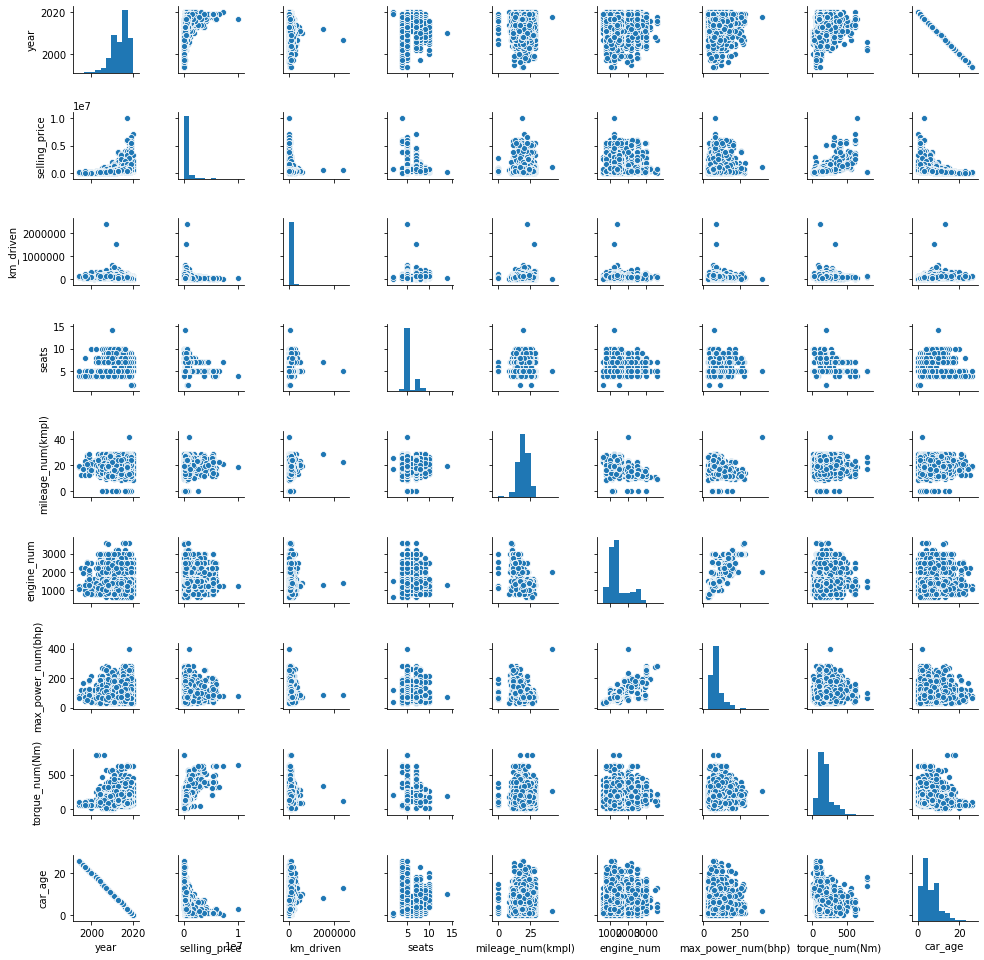

In [103]:
sns.pairplot(dados,height=1.5)

**Analisando apenas o preço pelas outras variáveis**

In [104]:
dados.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'mileage_num(kmpl)', 'engine_num', 'max_power_num(bhp)',
       'torque_num(Nm)', 'car_age'],
      dtype='object')

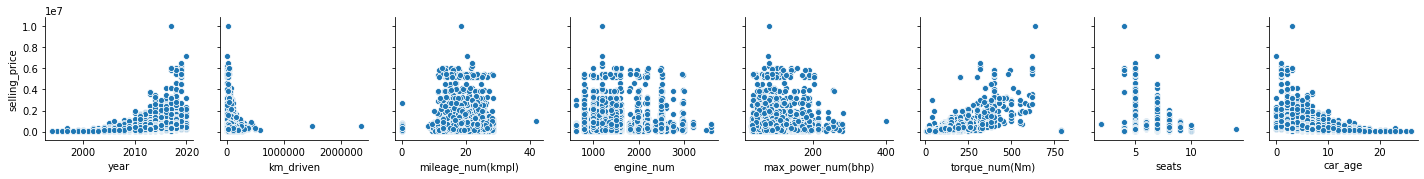

In [120]:
sns.pairplot(dados, x_vars=['year', 'km_driven', 'mileage_num(kmpl)', 'engine_num', 'max_power_num(bhp)', 'torque_num(Nm)',
       'seats', 'car_age'], y_vars=['selling_price'])

**Analisando individualmente as variáveis que mostraram influenciar o preço**

Analisando as variáveis quantitativas apenas

In [121]:
### Função utilitária para fazer a regressão com constante adicionada - desenvolvida em aula

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: coluna(s) do DataFrame utilizadas como variável(is) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

In [124]:
X = dados[['year', 'km_driven', 'mileage_num(kmpl)', 'engine_num', 'max_power_num(bhp)', 'torque_num(Nm)',
       'seats', 'car_age']]
Y = dados['selling_price']

results = regress(Y,X)
results.summary()

MissingDataError: exog contains inf or nans

Text(0, 0.5, 'Preço')

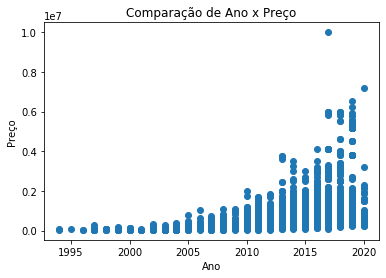

In [111]:
plt.scatter(dados['year'],dados['selling_price'])
plt.title('Comparação de Ano x Preço')
plt.xlabel('Ano')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

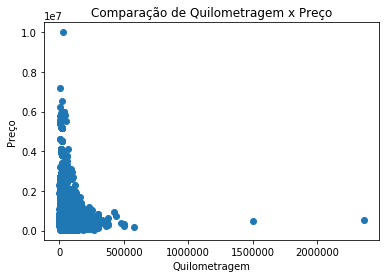

In [112]:
plt.scatter(dados['km_driven'],dados['selling_price'])
plt.title('Comparação de Quilometragem x Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')

Text(0, 0.5, 'Preço')

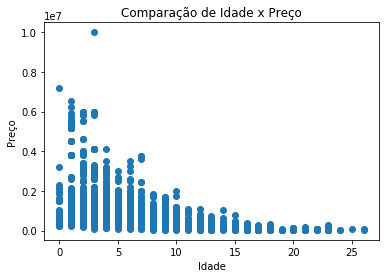

In [113]:
plt.scatter(dados['car_age'],dados['selling_price'])
plt.title('Comparação de Idade x Preço')
plt.xlabel('Idade')
plt.ylabel('Preço')

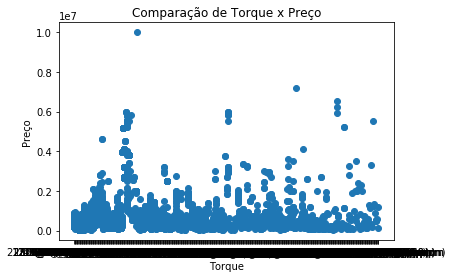

In [116]:
plt.scatter(dados['torque'],dados['selling_price'])
plt.title('Comparação de Torque x Preço')
plt.xlabel('Torque')
plt.ylabel('Preço')
plt.show()

Intuitivamente, a potência influenciaria no preço de um carro, mas isso não é evidenciado pelo gráfico abaixo. Vamos, posteriormente, comparar uma associação da potência e torque com o preço final do carro.

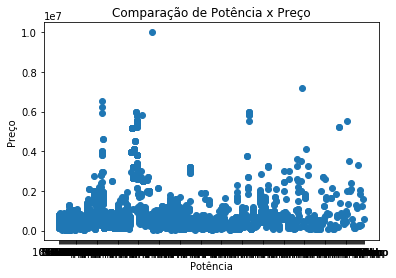

In [117]:
plt.scatter(dados['max_power'],dados['selling_price'])
plt.title('Comparação de Potência x Preço')
plt.xlabel('Potência')
plt.ylabel('Preço')
plt.show()

**Cruzamento 3D entre torque, potência e preço (em desenvolvimento)**

Utilizando a função elaborada em aula:

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

from IPython.display import display

In [ ]:
X2 = database[['max_power', 'torque']]
results2 = regress(Y,X2)
results2.summary()

In [ ]:
beta0 = results2.params[0]
beta1 = results2.params[1]
beta2 = results2.params[2]  

In [ ]:
def f(feature1, feature2):
    return beta0 + beta1*feature1 + beta2*feature2

In [ ]:
Y = database['selling_price']
feature1 = database['max_power']
feature2 = database['torque']

npoints = 100
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)

eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)
fit_z = f(eixo_x, eixo_y)

In [ ]:
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("Potência")
plt3d.set_ylabel("Torque")
plt3d.set_zlabel("Preço")
plt.show()